In [2028]:
import json   
import pprint
f =open('../data/立库信息.json',encoding='gb2312')    #打开文件 

In [2029]:
d1 = json.load(f)
lis_equipmentInfos = d1['equipmentInfos']
print(type(lis_equipmentInfos))
print(lis_equipmentInfos)

<class 'list'>
[{'sizeX': 0.0, 'sizeY': 0.0, 'sizeZ': 0.0, 'x': -18.52, 'y': 0.7, 'z': 21.24, 'name': '上货点1', 'processingCapacity': 5000.0, 'rate': 0.0, 'id': 1, 'waitInterval': 0.0, 'upPoint': [0.0, 0.0, 0.0], 'downPoint': [-2.97, 0.71, 21.19]}, {'sizeX': 0.0, 'sizeY': 0.0, 'sizeZ': 0.0, 'x': -2.95, 'y': 0.7, 'z': 19.49, 'name': '上货点2', 'processingCapacity': 5000.0, 'rate': 0.0, 'id': 2, 'waitInterval': 0.0, 'upPoint': [0.0, 0.0, 0.0], 'downPoint': [-2.97, 0.71, 21.19]}, {'sizeX': 0.0, 'sizeY': 0.0, 'sizeZ': 0.0, 'x': 0.03, 'y': 0.71, 'z': 23.98, 'name': '1号叠箱机', 'processingCapacity': 4000.0, 'rate': 1.0, 'id': 59, 'waitInterval': 5000.0, 'upPoint': [0.03, 0.71, 21.19], 'downPoint': [0.03, 0.71, 52.2]}]


In [2030]:
#存放所有节点的列表
list_Point = []
#获得所有上货点的信息
print(lis_equipmentInfos[0])
load_Point = ['上货点1','上货点2','上货点3']
#上货点坐标和名称
lis_load = []
lis_loadName = []
#上货点的下一个节点坐标
lis_loadDown = []

loadNum = 0 #上货点数量
#遍历 equipmentInfos 找出所有上货点
for i in range(len(lis_equipmentInfos)):
    if(lis_equipmentInfos[i]['name'] in load_Point):
        loadNum += 1
        lis_load.append(lis_equipmentInfos[i]['x'])
        lis_load.append(lis_equipmentInfos[i]['y'])
        lis_load.append(lis_equipmentInfos[i]['z'])
        lis_loadName.append(lis_equipmentInfos[i]['name'])
        lis_loadDown.append(lis_equipmentInfos[i]['downPoint'])
        
print("上货点的坐标为",lis_load)   
print("上货点的数量为",loadNum)    
print("上货点的下一个节点的坐标为",lis_loadDown)

#将上货点坐标加入 list_Point 中
for i in range(len(lis_equipmentInfos)):
    list_Point.append(lis_equipmentInfos[i]['x'])
    list_Point.append(lis_equipmentInfos[i]['y'])
    list_Point.append(lis_equipmentInfos[i]['z'])
print(list_Point)

{'sizeX': 0.0, 'sizeY': 0.0, 'sizeZ': 0.0, 'x': -18.52, 'y': 0.7, 'z': 21.24, 'name': '上货点1', 'processingCapacity': 5000.0, 'rate': 0.0, 'id': 1, 'waitInterval': 0.0, 'upPoint': [0.0, 0.0, 0.0], 'downPoint': [-2.97, 0.71, 21.19]}
上货点的坐标为 [-18.52, 0.7, 21.24, -2.95, 0.7, 19.49]
上货点的数量为 2
上货点的下一个节点的坐标为 [[-2.97, 0.71, 21.19], [-2.97, 0.71, 21.19]]
[-18.52, 0.7, 21.24, -2.95, 0.7, 19.49, 0.03, 0.71, 23.98]


In [2031]:
data = {
    'Tree_root':[]
}

data_name = {
    'Tree_root':[]
}

In [2032]:
#对lis_load 进行切片操作，获取单独的坐标
for i in range(loadNum):
    lis_load.append(lis_load[:3])
    del lis_load[0:3]
#将上货点的坐标加入树中
for i in range(loadNum):
    data['Tree_root'].append(lis_load[i])
    data_name['Tree_root'].append(lis_loadName[i])
print(lis_load)
print(data)
print(data_name)

[[-18.52, 0.7, 21.24], [-2.95, 0.7, 19.49]]
{'Tree_root': [[-18.52, 0.7, 21.24], [-2.95, 0.7, 19.49]]}
{'Tree_root': ['上货点1', '上货点2']}


In [2033]:
#将上货点的下一个坐标，即第一个交通点的坐标加入树中
for i in range(loadNum):
    data['%s'%(lis_load[i])] = lis_loadDown[i]
pprint.pprint(data)

{'Tree_root': [[-18.52, 0.7, 21.24], [-2.95, 0.7, 19.49]],
 '[-18.52, 0.7, 21.24]': [-2.97, 0.71, 21.19],
 '[-2.95, 0.7, 19.49]': [-2.97, 0.71, 21.19]}


In [2034]:
# 将所有交通点的坐标写入一个列表中，之后根据downPoint里的坐标去做对应。

In [2035]:
#type(lis_equipmentInfos) == list
#list -> dict

# dict_equipmentInfos = {}
# for i in range(0,len(lis_equipmentInfos),2):
#     dict_equipmentInfos[lis_equipmentInfos[i]] = lis_equipmentInfos[i+1]

In [2036]:
print(d1.keys())

dict_keys(['equipmentInfos', 'crossPoints', '堆垛机集合', '二楼Points', '出库交通点', '拆叠箱机12号', '拆叠箱机13号', '出库点1', '出库点2'])


In [2037]:
#print(d1['crossPoints'])
print(len(d1['crossPoints']))
# print(d1['堆垛机集合'])
# print(d1['出库交通点'])
# print(d1['拆叠箱机12号'])
# print(d1['拆叠箱机13号'])
# print(d1['出库点1'])
# print(d1['出库点2'])

15


In [2038]:
print(d1['crossPoints'][0])

{'x': -2.97, 'y': 0.71, 'z': 21.19, 'upPoint': [{'x': -18.52, 'y': 0.7, 'z': 21.24, 'id': 4, 'runtime': 621.9}, {'x': -2.95, 'y': 0.7, 'z': 19.49, 'id': 5, 'runtime': 68.23}], 'upPointCount': 2, 'downPoint': [{'x': 0.03, 'y': 0.71, 'z': 21.19, 'id': 3, 'runtime': 120.0}], 'downPointCount': 1, 'id': 6, 'entityName': 'E区传输线46'}


In [2039]:
lis_crossPoints = []
lis_crossPointsName = []
for i in range(len(d1['crossPoints'])):
    lis_crossPoints.append(d1['crossPoints'][i]['x'])
    lis_crossPoints.append(d1['crossPoints'][i]['y'])
    lis_crossPoints.append(d1['crossPoints'][i]['z'])
    list_Point.append(d1['crossPoints'][i]['x'])
    list_Point.append(d1['crossPoints'][i]['y'])
    list_Point.append(d1['crossPoints'][i]['z'])
    lis_crossPointsName.append(d1['crossPoints'][i]['entityName'])
    
print(lis_crossPoints)
print(len(lis_crossPoints))
print(lis_crossPointsName)
print(len(lis_crossPointsName))
print(type(d1['crossPoints'][0]['downPoint']))
print(list_Point)

[-2.97, 0.71, 21.19, 0.03, 0.71, 21.19, 0.03, 0.71, 52.2, -0.58, 0.71, 52.2, -0.58, 0.71, 51.27, -0.58, 0.71, 50.42, -0.58, 0.71, 48.56, -0.58, 0.71, 47.7, -0.58, 0.71, 45.82, -0.58, 0.71, 44.96, -0.58, 0.71, 43.09, -0.58, 0.71, 42.23, -0.58, 0.71, 40.33, -0.58, 0.71, 38.41, -0.58, 0.71, 36.53]
45
['E区传输线46', 'E区传输线50', 'F区传输线99', 'F区传输线56', 'F区传输线57', 'F区传输线58', 'F区传输线60', 'F区传输线61', 'F区传输线63', 'F区传输线64', 'F区传输线66', 'F区传输线67', 'F区传输线69', 'F区传输线71', 'F区传输线73']
15
<class 'list'>
[-18.52, 0.7, 21.24, -2.95, 0.7, 19.49, 0.03, 0.71, 23.98, -2.97, 0.71, 21.19, 0.03, 0.71, 21.19, 0.03, 0.71, 52.2, -0.58, 0.71, 52.2, -0.58, 0.71, 51.27, -0.58, 0.71, 50.42, -0.58, 0.71, 48.56, -0.58, 0.71, 47.7, -0.58, 0.71, 45.82, -0.58, 0.71, 44.96, -0.58, 0.71, 43.09, -0.58, 0.71, 42.23, -0.58, 0.71, 40.33, -0.58, 0.71, 38.41, -0.58, 0.71, 36.53]


In [2040]:
for i in range(len(d1['crossPoints'])):
    lis_crossPoints.append(lis_crossPoints[:3])
    del lis_crossPoints[:3]
    
print(lis_crossPoints)
print(len(lis_crossPoints))

for i in range(int(len(list_Point)/3)):
    list_Point.append(list_Point[:3])
    del list_Point[:3]

print(list_Point)
print(len(list_Point))

[[-2.97, 0.71, 21.19], [0.03, 0.71, 21.19], [0.03, 0.71, 52.2], [-0.58, 0.71, 52.2], [-0.58, 0.71, 51.27], [-0.58, 0.71, 50.42], [-0.58, 0.71, 48.56], [-0.58, 0.71, 47.7], [-0.58, 0.71, 45.82], [-0.58, 0.71, 44.96], [-0.58, 0.71, 43.09], [-0.58, 0.71, 42.23], [-0.58, 0.71, 40.33], [-0.58, 0.71, 38.41], [-0.58, 0.71, 36.53]]
15
[[-18.52, 0.7, 21.24], [-2.95, 0.7, 19.49], [0.03, 0.71, 23.98], [-2.97, 0.71, 21.19], [0.03, 0.71, 21.19], [0.03, 0.71, 52.2], [-0.58, 0.71, 52.2], [-0.58, 0.71, 51.27], [-0.58, 0.71, 50.42], [-0.58, 0.71, 48.56], [-0.58, 0.71, 47.7], [-0.58, 0.71, 45.82], [-0.58, 0.71, 44.96], [-0.58, 0.71, 43.09], [-0.58, 0.71, 42.23], [-0.58, 0.71, 40.33], [-0.58, 0.71, 38.41], [-0.58, 0.71, 36.53]]
18


In [2041]:
lis_crossPointsDownPoint = []
#提取downPoint里的坐标
for i in range(len(d1['crossPoints'])):
    for j in range(int(d1['crossPoints'][i]['downPointCount'])):
        lis_crossPointsDownPoint.append(d1['crossPoints'][i]['downPoint'][j]['x'])
        lis_crossPointsDownPoint.append(d1['crossPoints'][i]['downPoint'][j]['y'])
        lis_crossPointsDownPoint.append(d1['crossPoints'][i]['downPoint'][j]['z'])
#坐标分割为三个一组
for i in range(int(len(lis_crossPointsDownPoint)/3)):
    lis_crossPointsDownPoint.append(lis_crossPointsDownPoint[:3])
    del lis_crossPointsDownPoint[:3]
#将属于同一个节点的downPoint提取成一组 
for i in range(len(lis_crossPoints)):
    lis_crossPointsDownPoint.append(lis_crossPointsDownPoint[:int(d1['crossPoints'][i]['downPointCount'])])
    del lis_crossPointsDownPoint[:int(d1['crossPoints'][i]['downPointCount'])]
print(lis_crossPointsDownPoint)
print(len(lis_crossPointsDownPoint))

[[[0.03, 0.71, 21.19]], [[0.03, 0.71, 23.98]], [[-0.58, 0.71, 52.2]], [[-0.58, 0.71, 51.27]], [[-4.21, 0.71, 51.27], [-0.58, 0.71, 50.42]], [[-0.58, 0.71, 48.56], [-4.21, 0.71, 50.42]], [[-4.21, 0.71, 48.54], [-0.58, 0.71, 47.7]], [[-4.21, 0.71, 47.69], [-0.58, 0.71, 45.82]], [[-4.21, 0.71, 45.81], [-0.58, 0.71, 44.96]], [[-4.21, 0.71, 44.96], [-0.58, 0.71, 43.09]], [[-4.21, 0.71, 43.08], [-0.58, 0.71, 42.23]], [[-0.58, 0.71, 40.33], [-4.21, 0.71, 42.23]], [[-4.21, 0.71, 40.34], [-0.58, 0.71, 39.36]], [[-4.21, 0.71, 38.43], [-0.58, 0.71, 36.53]], [[-4.21, 0.71, 36.52]]]
15


In [2042]:
#将crossPoint 的 downPoint加入树中
for i in range(len(lis_crossPoints)):
    data['%s'%(lis_crossPoints[i])] = lis_crossPointsDownPoint[i]
#pprint.pprint(data)
#print(data)

print(data.keys())
print(type(data.values()))

dict_keys(['Tree_root', '[-18.52, 0.7, 21.24]', '[-2.95, 0.7, 19.49]', '[-2.97, 0.71, 21.19]', '[0.03, 0.71, 21.19]', '[0.03, 0.71, 52.2]', '[-0.58, 0.71, 52.2]', '[-0.58, 0.71, 51.27]', '[-0.58, 0.71, 50.42]', '[-0.58, 0.71, 48.56]', '[-0.58, 0.71, 47.7]', '[-0.58, 0.71, 45.82]', '[-0.58, 0.71, 44.96]', '[-0.58, 0.71, 43.09]', '[-0.58, 0.71, 42.23]', '[-0.58, 0.71, 40.33]', '[-0.58, 0.71, 38.41]', '[-0.58, 0.71, 36.53]'])
<class 'dict_values'>


In [2043]:
keys = data.keys()

values = data.values()

keys = list(keys)

values = list(values)
print(keys[1])
print(values[0][0])
print(str(keys[1]) == str(values[0][0]))

ls = [0]
ls[0] = {'1':'2'}
print(ls)

[-18.52, 0.7, 21.24]
[-18.52, 0.7, 21.24]
True
[{'1': '2'}]


In [2044]:
if('-2.97, 0.71, 21.19' in data):
    print("yes")

In [2045]:
#将list_Point 转化成字典
dic_Point = {}
for i in range(len(list_Point)):
    dic_Point['%d'%(i+1)] = list_Point[i]
print(dic_Point.values())

dict_values([[-18.52, 0.7, 21.24], [-2.95, 0.7, 19.49], [0.03, 0.71, 23.98], [-2.97, 0.71, 21.19], [0.03, 0.71, 21.19], [0.03, 0.71, 52.2], [-0.58, 0.71, 52.2], [-0.58, 0.71, 51.27], [-0.58, 0.71, 50.42], [-0.58, 0.71, 48.56], [-0.58, 0.71, 47.7], [-0.58, 0.71, 45.82], [-0.58, 0.71, 44.96], [-0.58, 0.71, 43.09], [-0.58, 0.71, 42.23], [-0.58, 0.71, 40.33], [-0.58, 0.71, 38.41], [-0.58, 0.71, 36.53]])


In [2046]:
print(data)
turns = 1
values_turns = 1
lis_turns = []
lis_keys = []
lis_values = []
lis_turns_values = []
data_new = {}
for i in data.keys():
    for j in dic_Point.values():
        if (str(i) == str(j)):
            #print(i)
            #print(turns)
            lis_turns.append(turns)
            lis_keys.append(i)
            i = str(i)
            #data["%d"%turns] = data.pop("%s"%i)
            turns += 1 

print(lis_keys)

for i in range(len(data)-1):
    data["%d"%lis_turns[i]] = data.pop("%s"%lis_keys[i])
print(data)



{'Tree_root': [[-18.52, 0.7, 21.24], [-2.95, 0.7, 19.49]], '[-18.52, 0.7, 21.24]': [-2.97, 0.71, 21.19], '[-2.95, 0.7, 19.49]': [-2.97, 0.71, 21.19], '[-2.97, 0.71, 21.19]': [[0.03, 0.71, 21.19]], '[0.03, 0.71, 21.19]': [[0.03, 0.71, 23.98]], '[0.03, 0.71, 52.2]': [[-0.58, 0.71, 52.2]], '[-0.58, 0.71, 52.2]': [[-0.58, 0.71, 51.27]], '[-0.58, 0.71, 51.27]': [[-4.21, 0.71, 51.27], [-0.58, 0.71, 50.42]], '[-0.58, 0.71, 50.42]': [[-0.58, 0.71, 48.56], [-4.21, 0.71, 50.42]], '[-0.58, 0.71, 48.56]': [[-4.21, 0.71, 48.54], [-0.58, 0.71, 47.7]], '[-0.58, 0.71, 47.7]': [[-4.21, 0.71, 47.69], [-0.58, 0.71, 45.82]], '[-0.58, 0.71, 45.82]': [[-4.21, 0.71, 45.81], [-0.58, 0.71, 44.96]], '[-0.58, 0.71, 44.96]': [[-4.21, 0.71, 44.96], [-0.58, 0.71, 43.09]], '[-0.58, 0.71, 43.09]': [[-4.21, 0.71, 43.08], [-0.58, 0.71, 42.23]], '[-0.58, 0.71, 42.23]': [[-0.58, 0.71, 40.33], [-4.21, 0.71, 42.23]], '[-0.58, 0.71, 40.33]': [[-4.21, 0.71, 40.34], [-0.58, 0.71, 39.36]], '[-0.58, 0.71, 38.41]': [[-4.21, 0.71

In [2047]:
# print(data.values())

# print(type(dic_Point.values()))

for j in dic_Point.values():
    print(j)
# for i in data.values():
#     for k in range(len(i)):
#         #print(i[k])


[-18.52, 0.7, 21.24]
[-2.95, 0.7, 19.49]
[0.03, 0.71, 23.98]
[-2.97, 0.71, 21.19]
[0.03, 0.71, 21.19]
[0.03, 0.71, 52.2]
[-0.58, 0.71, 52.2]
[-0.58, 0.71, 51.27]
[-0.58, 0.71, 50.42]
[-0.58, 0.71, 48.56]
[-0.58, 0.71, 47.7]
[-0.58, 0.71, 45.82]
[-0.58, 0.71, 44.96]
[-0.58, 0.71, 43.09]
[-0.58, 0.71, 42.23]
[-0.58, 0.71, 40.33]
[-0.58, 0.71, 38.41]
[-0.58, 0.71, 36.53]


In [2048]:
for i in data.values():
    #print(type(i[0]))
    print(i)
    # for j in range(len(i)):
    #     print(j)

[[-18.52, 0.7, 21.24], [-2.95, 0.7, 19.49]]
[-2.97, 0.71, 21.19]
[-2.97, 0.71, 21.19]
[[0.03, 0.71, 21.19]]
[[0.03, 0.71, 23.98]]
[[-0.58, 0.71, 52.2]]
[[-0.58, 0.71, 51.27]]
[[-4.21, 0.71, 51.27], [-0.58, 0.71, 50.42]]
[[-0.58, 0.71, 48.56], [-4.21, 0.71, 50.42]]
[[-4.21, 0.71, 48.54], [-0.58, 0.71, 47.7]]
[[-4.21, 0.71, 47.69], [-0.58, 0.71, 45.82]]
[[-4.21, 0.71, 45.81], [-0.58, 0.71, 44.96]]
[[-4.21, 0.71, 44.96], [-0.58, 0.71, 43.09]]
[[-4.21, 0.71, 43.08], [-0.58, 0.71, 42.23]]
[[-0.58, 0.71, 40.33], [-4.21, 0.71, 42.23]]
[[-4.21, 0.71, 40.34], [-0.58, 0.71, 39.36]]
[[-4.21, 0.71, 38.43], [-0.58, 0.71, 36.53]]
[[-4.21, 0.71, 36.52]]


In [2049]:
Flag = False
count = 0
for i in data.values():
    #print(type(i))
        #print(type(j))
    if (type(i[0]) == list):
        #print('yes')
        for k in range(len(i)):
            for j in dic_Point.values():
                if (str(i[k]) == str(j)):
                    lis_turns_values.append(values_turns)
                    lis_values.append(i[k])
                    print('已加入',i[k])
                    count += 1
                    Flag = True
                    break
                values_turns += 1 
            if(Flag == False):
                values_turns += 1 
                lis_values.append(i[k])
                print('已加入',i[k])
                count += 1
                lis_turns_values.append(values_turns)
            values_turns = 1
            Flag = False
    else :
        #print('no')
        for j in dic_Point.values():
            print('*****',i,'*****',j)
            if (str(i) == str(j)):
                lis_turns_values.append(values_turns)
                lis_values.append(i)
                print('已加入',i)
                count += 1
                Flag = True
                break
            values_turns += 1 
        if(Flag == False):
            values_turns += 1 
            lis_values.append(i)
            print('已加入',i)
            count += 1
            lis_turns_values.append(values_turns)
        values_turns = 1
        Flag = False
print(lis_turns_values)
print(lis_values)
print(count)

已加入 [-18.52, 0.7, 21.24]
已加入 [-2.95, 0.7, 19.49]
***** [-2.97, 0.71, 21.19] ***** [-18.52, 0.7, 21.24]
***** [-2.97, 0.71, 21.19] ***** [-2.95, 0.7, 19.49]
***** [-2.97, 0.71, 21.19] ***** [0.03, 0.71, 23.98]
***** [-2.97, 0.71, 21.19] ***** [-2.97, 0.71, 21.19]
已加入 [-2.97, 0.71, 21.19]
***** [-2.97, 0.71, 21.19] ***** [-18.52, 0.7, 21.24]
***** [-2.97, 0.71, 21.19] ***** [-2.95, 0.7, 19.49]
***** [-2.97, 0.71, 21.19] ***** [0.03, 0.71, 23.98]
***** [-2.97, 0.71, 21.19] ***** [-2.97, 0.71, 21.19]
已加入 [-2.97, 0.71, 21.19]
已加入 [0.03, 0.71, 21.19]
已加入 [0.03, 0.71, 23.98]
已加入 [-0.58, 0.71, 52.2]
已加入 [-0.58, 0.71, 51.27]
已加入 [-4.21, 0.71, 51.27]
已加入 [-0.58, 0.71, 50.42]
已加入 [-0.58, 0.71, 48.56]
已加入 [-4.21, 0.71, 50.42]
已加入 [-4.21, 0.71, 48.54]
已加入 [-0.58, 0.71, 47.7]
已加入 [-4.21, 0.71, 47.69]
已加入 [-0.58, 0.71, 45.82]
已加入 [-4.21, 0.71, 45.81]
已加入 [-0.58, 0.71, 44.96]
已加入 [-4.21, 0.71, 44.96]
已加入 [-0.58, 0.71, 43.09]
已加入 [-4.21, 0.71, 43.08]
已加入 [-0.58, 0.71, 42.23]
已加入 [-0.58, 0.71, 40.33]
已加

In [2050]:



turns_i = 0
for i in data.keys():
    if (type(data['%s'%i][0])==list):
        for j in range(len(data['%s'%i])):
            try:
                data['%s'%i][j] = lis_turns_values[turns_i]
                turns_i += 1
            except IndexError :
                break
    else:
        liss = []
        liss.append(lis_turns_values[turns_i])
        data['%s'%i] = liss
        turns_i += 1
    
print(data)


{'Tree_root': [1, 2], '1': [4], '2': [4], '3': [5], '4': [3], '5': [7], '6': [8], '7': [20, 9], '8': [10, 20], '9': [20, 11], '10': [20, 12], '11': [20, 13], '12': [20, 14], '13': [20, 15], '14': [16, 20], '15': [20, 20], '16': [20, 18], '17': [20]}


In [2051]:
def add_dic(ls):
    for i in range(len(ls)):
        k = str(ls[i])
        if k in data:
            l = data[k][:]
            add_dic(l)
            ls[i] = {k:l}
tree = {'Tree':data['Tree_root'][:]}
print(tree)
add_dic(tree['Tree'])
print(tree)

{'Tree': [1, 2]}
{'Tree': [{'1': [{'4': [{'3': [{'5': [{'7': [20, {'9': [20, {'11': [20, {'13': [20, {'15': [20, 20]}]}]}]}]}]}]}]}]}, {'2': [{'4': [{'3': [{'5': [{'7': [20, {'9': [20, {'11': [20, {'13': [20, {'15': [20, 20]}]}]}]}]}]}]}]}]}]}


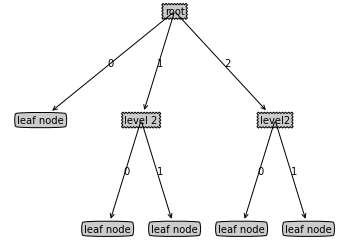

In [2052]:
# -*- coding: utf-8 -*-

import sys  
import os
import numpy as np
import matplotlib.pyplot as plt
import treePlotter as tp 



# 绘制树

myTree = {'root': {0: 'leaf node', 1: {'level 2': {0: 'leaf node', 1: 'leaf node'}},2:{'level2': {0: 'leaf node', 1: 'leaf node'}}}}
tp.createPlot(myTree)



